# Problem 1

### What is an outlier? 

__An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered 
abnormal.__

#### Another Definition With  Example:
> __A value that "lies outside" (is much smaller or larger than) most of the other values in a set of data. 
For example in the scores 25,29,3,32,85,33,27,28 both 3 and 85 are "outliers".__

# Problem 2

## Usually, we use boxplot to visualize the outliers, and describe how it works (if necessary draw the diagram) 

__The box and whisker plot, sometimes simply called the box plot, is a type of graph that help visualize the 
five-number summary. It doesn’t show the distribution in as much detail as histogram does, but it’s especially 
useful for indicating whether a distribution is skewed and whether there are potential unusual observations 
(outliers) in the data set. A box plot is ideal for comparing distributions because the centre, spread and 
overall range are immediately apparent.__

### In a box and whisker plot:
> **The left and right sides of the box are the lower and upper quartiles. The box covers the interquartile interval, 
where 50% of the data is found.The vertical line that split the box in two is the median. Sometimes, the mean is
also indicated by a dot or a cross on the box plot.The whiskers are the two lines outside the box, that go from 
the minimum to the lower quartile (the start of the box) and then from the upper quartile (the end of the box) 
to the maximum.The graph is usually presented with an axis that indicates the values. The box and whisker plot can be presented horizontally, or vertically. A variation of the box and whisker plot restricts the length of the whiskers to a maximum of 1.5 times the interquartile range. That is, the whisker reaches the value that is the furthest from the centre while still being inside a distance of 1.5 times the interquartile range from the lower or upper quartile. Data points that are outside this interval are represented as points on the graph and considered potential outliers.**

# Problem 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfC = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\IBA_BDA\Data Wrangling\Assign2\CarPrice.csv")
dfC.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
df1 = dfC.iloc[:,[9,11,16,21]]
df1.head(10)

,wheelbase,carwidth,enginesize,horsepower
0,88.6,64.1,130,111
1,88.6,64.1,130,111
2,94.5,65.5,152,154
3,99.8,66.2,109,102
4,99.4,66.4,136,115
5,99.8,66.3,136,110
6,105.8,71.4,136,110
7,105.8,71.4,136,110
8,105.8,71.4,131,140
9,99.5,67.9,131,160


### i. Visualize the outliers in the following attributes “wheelbase”, “carwidth”, and “enginesize”

<AxesSubplot:>

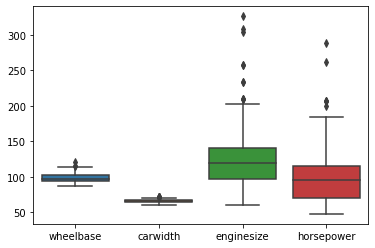

In [4]:
sns.boxplot(data=df1)

<AxesSubplot:xlabel='wheelbase'>

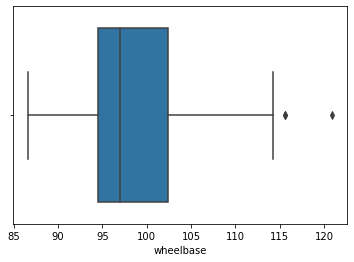

In [5]:
sns.boxplot(x=df1["wheelbase"])

<AxesSubplot:xlabel='carwidth'>

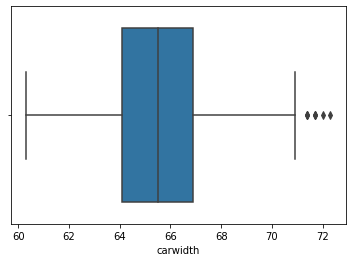

In [6]:
sns.boxplot(x=df1["carwidth"])

<AxesSubplot:xlabel='enginesize'>

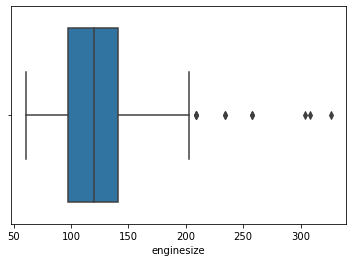

In [7]:
sns.boxplot(x=df1["enginesize"])

### ii. Count the number of outliers in each attribute of part i


In [8]:
def find_boundaries(df, variable, distance):
    Q1 =  df[variable].quantile(0.25)
    Q3 =  df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - (IQR * distance)
    upper_boundary = Q3 + (IQR * distance)
    return lower_boundary,upper_boundary

In [9]:
WB_LB,WB_UB = find_boundaries(df1,'wheelbase',1.5)
print(WB_LB,WB_UB)

82.64999999999999 114.25000000000001


In [10]:
print(df1["wheelbase"][(df1["wheelbase"]<WB_LB)].count())
print(df1["wheelbase"][(df1["wheelbase"]>WB_UB)].count())

0
3


In [11]:
CW_LB,CW_UB = find_boundaries(df1,'carwidth',1.5)
print(CW_LB,CW_UB)

59.89999999999998 71.10000000000002


In [12]:
print(df1["carwidth"][(df1["carwidth"]<CW_LB)].count())
print(df1["carwidth"][(df1["carwidth"]>CW_UB)].count())

0
8


In [13]:
ES_LB,ES_UB = find_boundaries(df1,'enginesize',1.5)
print(ES_LB,ES_UB)

31.0 207.0


In [14]:
print(df1["enginesize"][(df1["enginesize"]<ES_LB)].count())
print(df1["enginesize"][(df1["enginesize"]>ES_UB)].count())

0
10


### iii. If the outliers count is less than 4 in any above attributes remove it.


In [15]:
#1. Let's create a Boolean vector to flag the outliers in RM:

outliers_WB = np.where(df1['wheelbase'] < WB_LB, True, np.where(df1['wheelbase'] > WB_UB, True,False))
print(df1['wheelbase'][outliers_WB].count())
print(outliers_WB)

3
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False 

In [16]:
df1.shape

(205, 4)

In [17]:
df1.loc[(outliers_WB)]

,wheelbase,carwidth,enginesize,horsepower
70,115.6,71.7,183,123
71,115.6,71.7,234,155
73,120.9,71.7,308,184


In [18]:
#There is 3 Outliers in wheelbase attribute so remove the outlier is a better option

df1 = df1.loc[~(outliers_WB)]
print(df1.shape)

(202, 4)


### iv. If the outliers count is greater than or equal to 4 in any above attributes, make it NaN followed by filling it with the appropriate method.

In [19]:
# This Code will turns your Outliers With NaN Value
df1["carwidth"] = df1["carwidth"][(df1["carwidth"]< CW_UB) & (df1["carwidth"] > CW_LB)]   
df1["carwidth"].isna().sum()

5

In [20]:
df1["carwidth"].value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
65.6     6
66.3     6
67.2     6
64.2     6
66.9     5
67.9     5
64.8     4
68.9     4
65.7     4
70.3     3
65.0     3
63.9     3
69.6     2
67.7     2
66.1     2
68.3     2
64.6     2
64.1     2
66.6     1
63.4     1
70.6     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64

In [21]:
df1["carwidth"].fillna(df1["carwidth"].interpolate(method="linear",limit_direction="both"),inplace=True)
print(df1["carwidth"].isna().sum())

0


In [22]:
df1["enginesize"].value_counts()

122    15
92     15
98     14
97     14
108    13
110    12
90     12
109     8
141     7
120     7
146     6
121     6
152     6
181     6
91      5
156     5
136     5
130     4
194     3
171     3
183     3
70      3
164     3
209     3
134     2
131     2
258     2
140     2
132     2
80      1
203     1
173     1
161     1
61      1
151     1
79      1
111     1
119     1
103     1
304     1
234     1
326     1
145     1
Name: enginesize, dtype: int64

In [23]:
# This Code will turns your Outliers With NaN Value
df1["enginesize"] = df1["enginesize"][(df1["enginesize"]> ES_LB) & (df1["enginesize"] < ES_UB)]   
df1["enginesize"].isna().sum()

8

In [24]:
df1["enginesize"] = df1["enginesize"].fillna(df1["enginesize"].bfill().ffill())

In [25]:
df1["enginesize"].isna().sum()

0

### v. Visualize the outlier in the “horsepower” attribute, and remove it by the binning method

<AxesSubplot:xlabel='horsepower'>

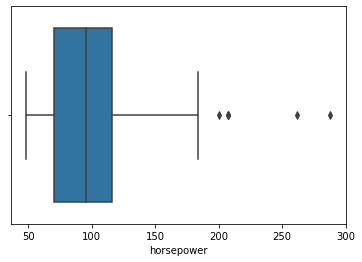

In [26]:
sns.boxplot(x=df1['horsepower'])

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

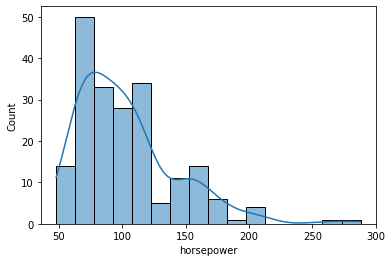

In [27]:
sns.histplot(x=df1["horsepower"],kde=True)

In [28]:
df1['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
160     6
101     6
62      6
114     6
88      6
76      5
102     5
97      5
90      5
145     5
84      5
82      5
86      4
92      4
111     4
73      3
207     3
85      3
152     3
123     3
182     3
121     3
161     2
112     2
94      2
162     2
100     2
52      2
156     2
56      2
176     2
64      1
58      1
140     1
115     1
134     1
48      1
60      1
288     1
120     1
143     1
142     1
200     1
78      1
55      1
262     1
135     1
175     1
184     1
155     1
154     1
72      1
106     1
Name: horsepower, dtype: int64

In [29]:
#Custom Binning
df1['horsepower'] = pd.cut(df1['horsepower'], [0,50,100,150,200,300], labels=[50,100,150,200,300], include_lowest=True )

In [30]:
df1['horsepower'] = df1['horsepower'].astype("int")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   202 non-null    float64
 1   carwidth    202 non-null    float64
 2   enginesize  202 non-null    float64
 3   horsepower  202 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 15.2 KB


In [31]:
df1["horsepower"].value_counts()

100    112
150     59
200     25
300      5
50       1
Name: horsepower, dtype: int64

# Problem 4

### i. Extract the car name from the “CarName” attribute (the first word of the “CarName” attribute

In [32]:
df2 = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\IBA_BDA\Data Wrangling\Assign2\CarPrice_Structure.csv")
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
carname =df2['CarName'].str.split(' ').str[0]
carname.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

### ii. In the “CarPrice_Structure” dataset the “doornumber” and the “carlength" have the structuring issue. Write the regex for the solution accordingly 

In [35]:
df2["doornumber"].value_counts()

four    111
two      85
2         5
4         4
Name: doornumber, dtype: int64

In [45]:
df2['doornumber'] = df2['doornumber'].replace(to_replace=["2", "4"], value=["two","four"])
df2["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [38]:
df2["carlength"].unique()

array(['168.8', '171.2', '176.6', '177.3', '192.7', '178.2', '176.8cm',
       '176.8', '189', '193.8', '197', '141.1', '155.9', '158.8', '157.3',
       '174.6', '173.2', '144.6', '150', '163.4', '157.1', '167.5',
       '175.4', '169.1', '170.7', '172.6', '199.6', '191.7', '159.1',
       '166.8', '169', '177.8', '175', '190.9cm', '190.9', '187.5',
       '202.6', '180.3', '208.1', '199.2', '178.4', '173', '172.4',
       '165.3', '170.2', '165.6', '162.4', '173.4', '181.7', '184.6',
       '178.5', '186.7', '186.7cm', '198.9', '167.3', '168.9', '175.7',
       '181.5', '186.6', '156.9cm', '157.9', '172', '173.5', '173.6',
       '158.7', '169.7', '166.3', '168.7', '176.2', '175.6', '183.5',
       '187.8', '171.7', '159.3', '165.7', '180.2', '183.1', '188.8'],
      dtype=object)

In [39]:
df2= df2.replace({
    'carlength':'[A-Za-z]',
    },'',regex=True)

In [47]:
print(df2["carlength"].unique())

['168.8' '171.2' '176.6' '177.3' '192.7' '178.2' '176.8' '189' '193.8'
 '197' '141.1' '155.9' '158.8' '157.3' '174.6' '173.2' '144.6' '150'
 '163.4' '157.1' '167.5' '175.4' '169.1' '170.7' '172.6' '199.6' '191.7'
 '159.1' '166.8' '169' '177.8' '175' '190.9' '187.5' '202.6' '180.3'
 '208.1' '199.2' '178.4' '173' '172.4' '165.3' '170.2' '165.6' '162.4'
 '173.4' '181.7' '184.6' '178.5' '186.7' '198.9' '167.3' '168.9' '175.7'
 '181.5' '186.6' '156.9' '157.9' '172' '173.5' '173.6' '158.7' '169.7'
 '166.3' '168.7' '176.2' '175.6' '183.5' '187.8' '171.7' '159.3' '165.7'
 '180.2' '183.1' '188.8']


In [41]:
df2.head(50)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


### iii. Replace the values of the “fueltype” attribute from string categorical to numeric categorical

In [42]:
df2["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [43]:
encode_ft = {"diesel":0,"gas":1}
df2["fueltype"] = df2["fueltype"].replace(encode_ft)

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    object 
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1